In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving romeo_&_juliet.txt to romeo_&_juliet.txt


In [ ]:
file = open("romeo_&_juliet.txt", "r", encoding = "utf8")

#store file in list
lines = []
for i in file:
  lines.append(i)

#convert list to string
data = ""
for i in lines:
  data = ' '.join(lines)
data[:300]

In [ ]:
#remove unwanted data
data = data.replace('\n','').replace('\r','').replace('\ufeff','')

#remove unwanted spaces
data = data.split()
data = ' '.join(data)
data[:300]   #trying to print data

'The Project Gutenberg eBook of Romeo and Juliet, by William Shakespeare This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project'

In [ ]:
# NER
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(data[:300])
displacy.render(doc,style='dep',jupyter=True,options={'distance':110})

In [ ]:
displacy.render(doc,style="ent",jupyter=True)

In [ ]:
# stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens = word_tokenize(data[:300])

stop_words = set(stopwords.words("english"))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

list_to_str = ', '.join(filtered_tokens)
print(list_to_str)

Project, Gutenberg, eBook, Romeo, Juliet, ,, William, Shakespeare, eBook, use, anyone, anywhere, United, States, parts, world, cost, almost, restrictions, whatsoever, ., may, copy, ,, give, away, re-use, terms, Project


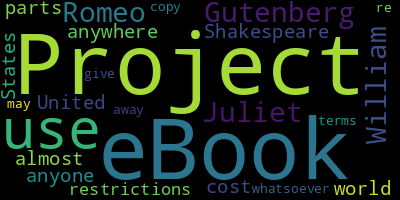

In [ ]:
from wordcloud import WordCloud
wordcloud=WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
wordcloud.generate(list_to_str)
wordcloud.to_image()

In [ ]:
#To tokenize words
import nltk
nltk.download('punkt')
text = data[:100]
tokens = nltk.word_tokenize(text)
print(tokens)

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Romeo', 'and', 'Juliet', ',', 'by', 'William', 'Shakespeare', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Frequency
from nltk.probability import FreqDist
fdist = FreqDist()

for i in tokens:
  fdist[i]=fdist[i]+1
fdist

FreqDist({'eBook': 2, 'of': 2, 'The': 1, 'Project': 1, 'Gutenberg': 1, 'Romeo': 1, 'and': 1, 'Juliet': 1, ',': 1, 'by': 1, ...})

In [ ]:
#top tokens
top_15 = fdist.most_common(15)
top_15

[('eBook', 2),
 ('of', 2),
 ('The', 1),
 ('Project', 1),
 ('Gutenberg', 1),
 ('Romeo', 1),
 ('and', 1),
 ('Juliet', 1),
 (',', 1),
 ('by', 1),
 ('William', 1),
 ('Shakespeare', 1),
 ('This', 1),
 ('is', 1),
 ('for', 1)]

In [ ]:
#POS tagging
import nltk
nltk.download('averaged_perceptron_tagger')

for i in tokens:
  print(nltk.pos_tag([i]))

[('The', 'DT')]
[('Project', 'NN')]
[('Gutenberg', 'NNP')]
[('eBook', 'NN')]
[('of', 'IN')]
[('Romeo', 'NN')]
[('and', 'CC')]
[('Juliet', 'JJ')]
[(',', ',')]
[('by', 'IN')]
[('William', 'NNP')]
[('Shakespeare', 'NN')]
[('This', 'DT')]
[('eBook', 'NN')]
[('is', 'VBZ')]
[('for', 'IN')]
[('the', 'DT')]
[('use', 'NN')]
[('of', 'IN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
len(data)

160118

Texts to Sequences


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])  #to update the internal vocabulary for the texts list

#saving the tokenizer for predict function
pickle.dump(tokenizer,open('token.pkl','wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]   #to covert string/data to numeric representation
sequence_data[:10]


[1, 53, 127, 306, 6, 12, 2, 22, 32, 970]

In [ ]:
vocab_size = len(tokenizer.word_index)+1 #FIND THE LENGTH OF VECTORS MADE
print(vocab_size)

4294


In [ ]:
sequences = []

for i in range(3,len(sequence_data)):
  words = sequence_data[i-3:i+1] #3 words input, last word output
  sequences.append(words) #appending each four words id into list

print("The length of sequences are: ",len(sequences))
sequences = np.array(sequences) #converting sequences to array
sequences[:10]

The length of sequences are:  29300


array([[  1,  53, 127, 306],
       [ 53, 127, 306,   6],
       [127, 306,   6,  12],
       [306,   6,  12,   2],
       [  6,  12,   2,  22],
       [ 12,   2,  22,  32],
       [  2,  22,  32, 970],
       [ 22,  32, 970, 785],
       [ 32, 970, 785,  16],
       [970, 785,  16, 306]])

Seperating input and output

In [ ]:
X = []
Y = []

for i in sequences:
  X.append(i[0:3])
  Y.append(i[3])

X = np.array(X)
Y = np.array(Y)



In [ ]:
print("Input:", X[:3])
print("Output:",Y[:3])

Input: [[  1  53 127]
 [ 53 127 306]
 [127 306   6]]
Output: [306   6  12]


In [ ]:
Y = to_categorical(Y,num_classes = vocab_size) #converting class vectors to binary class matrix
Y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Creating a model

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,10,input_length=3))
model.add(LSTM(1000,return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000,activation="relu"))
model.add(Dense(vocab_size,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             42940     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 4294)              4298294   
                                                                 
Total params: 17,390,234
Trainable params: 17,390,234
Non-trainable params: 0
_________________________________________________________________


Plot the model

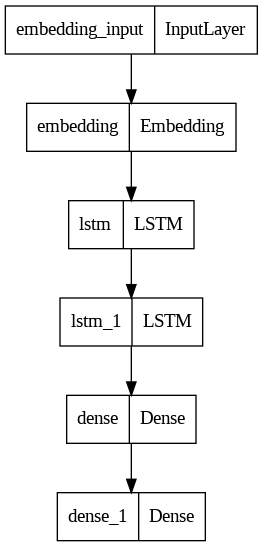

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model,to_file='plot.png',show_layer_names=True)

Build the model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5",monitor='loss',verbose=1,save_best_only=True)
model.compile(loss="categorical_crossentropy",optimizer='Adam')
model.fit(X,Y,epochs=20,batch_size=64,callbacks=[checkpoint])

Epoch 1/20
 69/458 [===>..........................] - ETA: 2:15 - loss: 7.2521

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
import nltk
nltk.download('averaged_perceptron_tagger')


#load model and tokenizer
model=load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl','rb'))

def Predict_Next_Words(model,tokenizer,text):
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence)) #return indices of maximum value
  predicted_word = ""

  for key, value in tokenizer.word_index.items(): #iterate over each item in the dictionary of tokenizer file
    if value == preds :
      predicted_word = key
      break

  #print(nltk.pos_tag([predicted_word]))
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text=input("Enter: ")

  if text=="0":
    print("Exit")
    break

  else:
    try:
      text = text.split(" ")
      text = text[-3:]
      print(text)

      Predict_Next_Words(model,tokenizer,text)


    except Exception as e:
      print("Error occurrred: ",e)
      continue
